# 분류(Classification)의 개요

## 결정 트리 실습 1) 와인 데이터 - Kaggle 와인 데이터를 일부 활용하여 사용

In [50]:
# 데이터 수집
import pandas as pd
import numpy as np
wine_kaggle = pd.read_csv('C:/Users/gihun/Python_Data/data/wine_dataset.csv')
wine_kaggle

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [51]:
wine_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [52]:
wine_kaggle['style'].value_counts(normalize=True) # normalize=True 비율로 나옴!

white    0.753886
red      0.246114
Name: style, dtype: float64

In [53]:
# wine_kaggle의 alcohol, residual_sugar, ph, style 데이터만 사용하고 싶음!
wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH', 'style']]
wine

,alcohol,residual_sugar,pH,style
0,9.4,1.9,3.51,red
1,9.8,2.6,3.20,red
2,9.8,2.3,3.26,red
3,9.8,1.9,3.16,red
4,9.4,1.9,3.51,red
...,...,...,...,...
6492,11.2,1.6,3.27,white
6493,9.6,8.0,3.15,white
6494,9.4,1.2,2.99,white
6495,12.8,1.1,3.34,white


In [54]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alcohol         6497 non-null   float64
 1   residual_sugar  6497 non-null   float64
 2   pH              6497 non-null   float64
 3   style           6497 non-null   object 
dtypes: float64(3), object(1)
memory usage: 203.2+ KB


In [55]:
wine.describe()

,alcohol,residual_sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [56]:
# 데이터 준비, 분할
X=wine.drop(columns='style').values # 혹은 drop('style', axis=1)
y=wine['style'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [57]:
pd.Series(y_train).value_counts(normalize=True),pd.Series(y_test).value_counts(normalize=True)

(white    0.753896
 red      0.246104
 dtype: float64,
 white    0.753846
 red      0.246154
 dtype: float64)

In [ ]:
#와인데이터 from Keggle
#0이면 레드와인, 1이면 화이트 -> 전체 와인 중 화이트와인을 골라낸다

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# 결정트리 모델 객체 생성, 학습, 평가
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt.predict(X_train_scaled)
y_pred2 = dt.predict(X_test_scaled)
train_score = accuracy_score(y_train, y_pred)
test_score = accuracy_score(y_test, y_pred2)

print(f'train score is {train_score}')
print(f'test score is {test_score}')

train score is 0.9978833942659227
test score is 0.8646153846153846


In [38]:
# 과적합 모델: train_score 가 높은데, test_score가 낮은 경우!

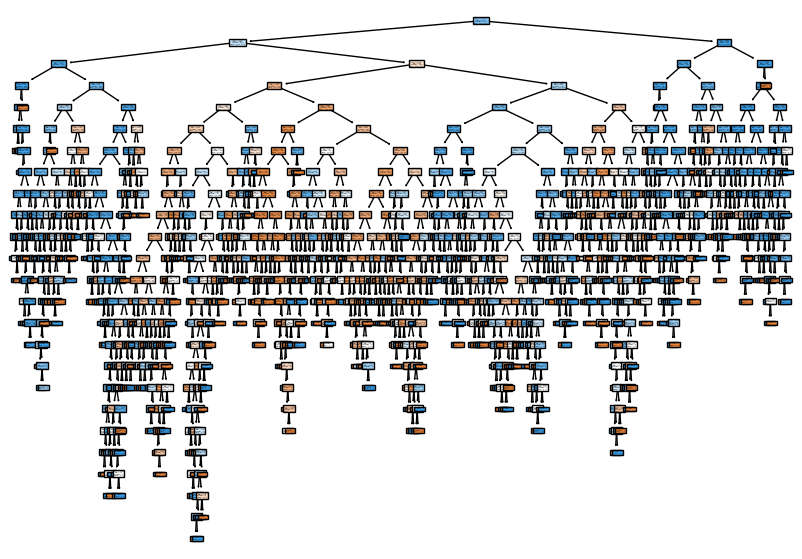

In [61]:
# 시각화 : plot_tree()
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True)
#plot_tree(dt,max_depth=3,filled=True)
plt.show()

In [63]:
import graphviz
from sklearn.tree import export_graphviz
label_names = ['red','white']
dot_data=export_graphviz(dt,out_file=None, class_names=label_names, feature_names= ['alcohol', 'sugar', 'pH'], impurity=True, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('wine_kaggle')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.805383 to fit


'wine_kaggle.png'

In [ ]:
# Plot_tree()  트리 깊이 제한, 색깔 부여, 특성 이름 전달


* 가지치기 - 과적합 방지, (깊이 제한 ) 

In [47]:
dt2 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt2.fit(X_train_scaled,y_train)
train_score = accuracy_score(y_train,y_pred)
test_score = accuracy_score(y_test, y_pred2)
print(train_score, test_score)

0.9978833942659227 0.8646153846153846


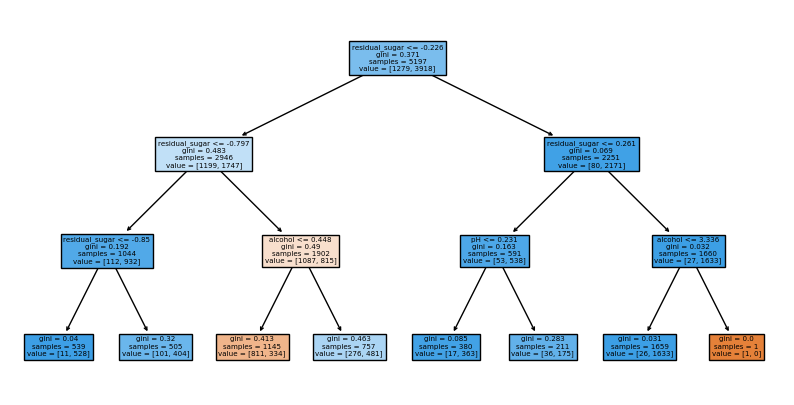

In [49]:
# 가지치기한 dt를 시각화
plt.figure(figsize=(10,5))
plot_tree(dt2, filled=True, feature_names=wine.columns) # feature_names 설정하면 가지치기 기준을 설정할 수 있음!
plt.show()

* 결정 트리에서 특성 스케일링 필요성

In [66]:
# 특성을 스케일링 하지 않은 경우
# 1/ max_depth 제한 없는 경우
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
train_score = accuracy_score(y_train, y_pred)

y_pred2 = dt.predict(X_test)
test_score = accuracy_score(y_test, y_pred2)

print(train_score, test_score) # 특성을 스케일링하지 않아도 점수가 똑같다. 그러므로 스케일링 하지 않아도 된다!

# 2/ max_depth 3으로 제한한 경우
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_train)
train_score = accuracy_score(y_train, y_pred)

y_pred2 = dt2.predict(X_test)
test_score = accuracy_score(y_test, y_pred2)

print(train_score, test_score)

0.9978833942659227 0.8653846153846154
0.8458726188185491 0.8407692307692308


In [ ]:
# 표준화 스케일링 하지 않은 DT 시각화 -> 이해하기 쉽다


#### 특성 중요도(Feature Importance)
- 어떤 특성이 가장 유용한 특성인지 나타냄
- feature_importances_  속성에 저장되어 있음

- 특성 중요도 계산 원리: 각 노드의 정보 이득 * 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산함
- 특성 중요도의 활용: 특성 선택에 활용(즉, 결정 트리 모델을 특성 선택에 활용)

In [68]:
pd.Series(dt.feature_importances_, index=['alcohol','sugar','pH'])

alcohol    0.233939
sugar      0.514503
pH         0.251558
dtype: float64

<AxesSubplot: >

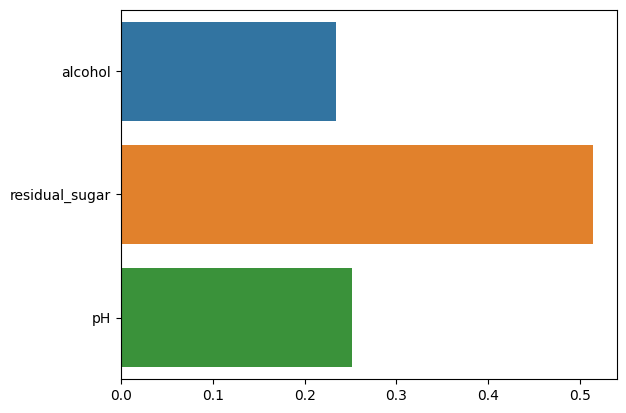

In [70]:
import seaborn as sns
sns.barplot(x=dt.feature_importances_, y=wine.columns[:-1])

## 결정 트리 실습 2) 붓꽃 데이터 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [3]:
# 성능 평가
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
0.9666666666666667


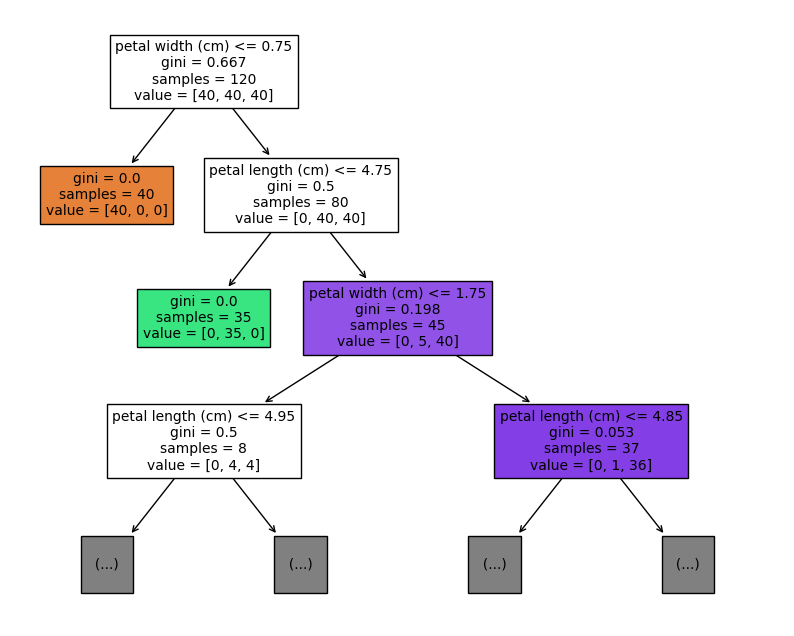

In [4]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(dt,max_depth=3, filled=True, feature_names=iris.feature_names)
plt.show() # 더 이상 분할을 할 수 없는 것들 = leaf, rootp = 제일 머리,  # 결정트리 단점: 트리가 복잡해지면 해석도 어렵고, 이상치에 엄청나게 민감한 성격이 있음

## 참고: 엔트로피를 사용하여 결정트리 만들기

### 결정 트리 모델의 시각화(Decision Tree Visualization)

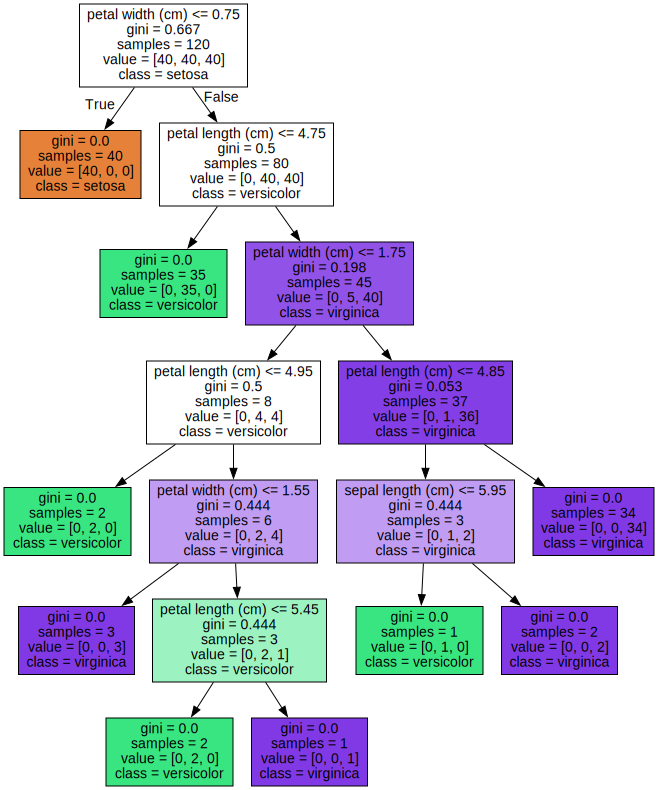

In [5]:
#Graphviz 패키지 사용
import graphviz
from sklearn.tree import export_graphviz
label_names=iris.target_names
#best_dt =grid.best_estimator
dot_data = export_graphviz(dt, out_file=None, class_names=label_names,\
                           feature_names = iris.feature_names,\
                           impurity=True, filled=True)

# Draw graph with png format , default pdf
graph = graphviz.Source(dot_data, format="png") 
graph

# 파일로 만드는 경우, 
#graph.render('tree')

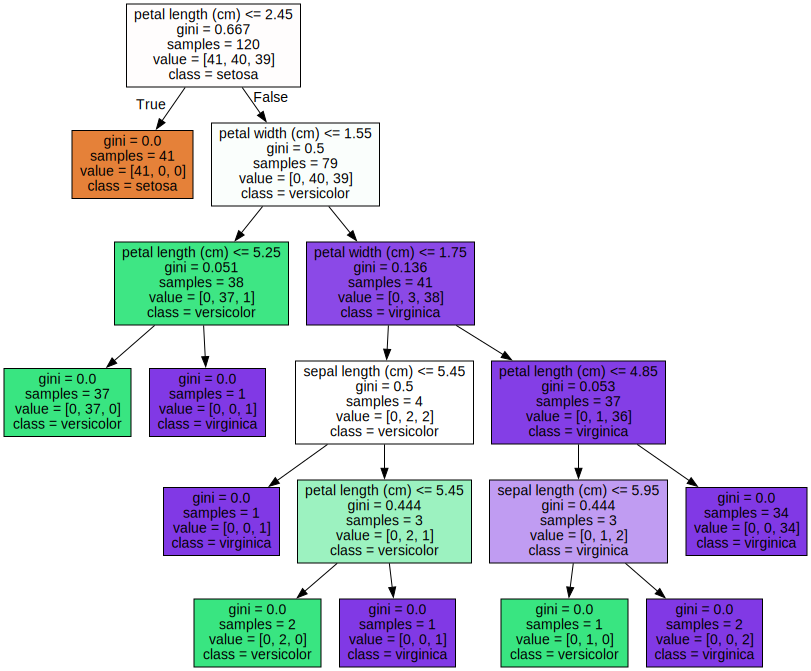

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 결정 트리의 중요한 역할 피처: feature_importances_

In [7]:
dt.feature_importances_

array([0.01666667, 0.        , 0.42987988, 0.55345345])

### 결정 트리(Decision TREE) 과적합(Overfitting)
- 결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리노드를 계속해서 만들어 가므로 매우 복잡한 트리가 만들어져 쉽게 과적합된다.

- 결정트리 하이퍼파라미터 : 복잡한 트리 생성 방지 목적이 크다.

* max_depth: 결정 트리 최대 깊이 제한
* min_samples_split: 자식 노드를 분할하기 위한 최소한의 샘플데이터 수
* min_samples_leaf: 리프 노드가 될 수 있는 샘플 데이터 건수의 최소값

# 교차검증과 그리드 서치

In [72]:
import pandas as pd
wine = pd.read_csv('C:/Users/gihun/python_data/data/wine_dataset.csv')
# 클래스 열을 타겟으로 사용하고 나머지 열은 특성 배열에 저장
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [74]:
data = wine[['alcohol','residual_sugar', 'pH']].to_numpy()
target = wine['style'].to_numpy()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # 두번 나눔
print(X_sub_train.shape, X_val.shape)

(4157, 3) (1040, 3)


In [76]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub_train, y_sub_train)
print(dt.score(X_sub_train, y_sub_train))
print(dt.score(X_val, y_val))

0.9971133028626413
0.864423076923077


In [77]:
# 상기 모델은 과적합

In [94]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [95]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [96]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009373,0.000516,0.002203,0.000401,0.0001,{'min_impurity_decrease': 0.0001},0.869231,0.868269,0.882579,0.867180,0.853705,0.868193,0.009154,1
1,0.009003,0.000894,0.002201,0.000400,0.0002,{'min_impurity_decrease': 0.0002},0.871154,0.863462,0.876805,0.854668,0.856593,0.864536,0.008437,5
2,0.008201,0.000400,0.002402,0.000491,0.0003,{'min_impurity_decrease': 0.0003},0.869231,0.859615,0.875842,0.850818,0.869105,0.864922,0.008745,4
3,0.010000,0.003034,0.002403,0.000491,0.0004,{'min_impurity_decrease': 0.0004},0.869231,0.863462,0.881617,0.848893,0.875842,0.867809,0.011260,2
4,0.008999,0.001265,0.002017,0.000263,0.0005,{'min_impurity_decrease': 0.0005},0.865385,0.869231,0.882579,0.849856,0.871030,0.867616,0.010570,3


In [100]:
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001),
        'max_depth':range(5,20,1),
        'min_samples_split':range(2,100,10)}
gs2 = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs2.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [102]:
gs2.best_params_

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}

----------------------------------------------------------------------

In [101]:
gs2.cv_results_

{'mean_fit_time': array([0.00776744, 0.00741606, 0.00709152, ..., 0.00707955, 0.00695691,
        0.00677795]),
 'std_fit_time': array([0.0003835 , 0.00047848, 0.00068831, ..., 0.00030159, 0.00061038,
        0.00038958]),
 'mean_score_time': array([0.00219879, 0.00238466, 0.00219994, ..., 0.00269985, 0.00238652,
        0.00235028]),
 'std_score_time': array([0.00039668, 0.00080593, 0.00039933, ..., 0.00098154, 0.00047401,
        0.00062943]),
 'param_max_depth': masked_array(data=[5, 5, 5, ..., 19, 19, 19],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0001, 0.0001, ..., 0.0009000000000000001,
                    0.0009000000000000001, 0.0009000000000000001],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 12, 22, ..., 72, 82, 92]

In [103]:
gs2.score(X_val, y_val)

0.8951923076923077

In [104]:
gs2.score(X_test, y_test)

0.8615384615384616

# [실습] 타이타닉 데이터 결정트리 분류

* 타이타닉 데이터를 결정트리 알고리듬에 따라 분류하고, 로지스틱 회귀와 평가지표를 비교하라

# [심화] 결정 트리 실습 - Human Activity Recognition